Library imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_auc_score

import utilities as utils

Loads the datacube

In [3]:
data = utils.load_dataset('data2/2021_Table04_Datacube.csv')
data.head()

,"ï»¿""H3_Address""",H3_Resolution,H3_Geometry,Longitude_EPSG4326,Latitude_EPSG4326,Continent_Majority,Continent_Minority,Country_Majority,Country_Minority,Province_Majority,...,Litmod_Density_Asthenosphere,Litmod_Density_Crust,Litmod_Density_Lithosphere,Crust1_Type,Crust1_CrustalThickness,Crust1_SedimentThickness,Training_MVT_Deposit,Training_MVT_Occurrence,Training_CD_Deposit,Training_CD_Occurrence
0,8712e579bffffff,7,"POLYGON ((-115.0314 54.5077, -115.0393 54.4961...",-115.018142,54.497221,North America,North America,Canada,Canada,Alberta,...,3480.580078,2891.260254,3337.300049,island arc,-38.450497,2991.459961,Absent,Absent,Absent,Absent
1,8712e579affffff,7,"POLYGON ((-115.0658 54.51706, -115.0737 54.505...",-115.052542,54.506590,North America,North America,Canada,Canada,Alberta,...,3480.580078,2891.260010,3337.300293,island arc,-38.430000,3000.000244,Absent,Absent,Absent,Absent
2,8712e56b4ffffff,7,"POLYGON ((-115.0604 54.49501, -115.0682 54.483...",-115.047107,54.484541,North America,North America,Canada,Canada,Alberta,...,3480.580078,2891.259766,3337.300049,island arc,-38.430000,3000.000000,Absent,Absent,Absent,Absent
3,8712e56b5ffffff,7,"POLYGON ((-115.026 54.48564, -115.0338 54.4740...",-115.012729,54.475169,North America,North America,Canada,Canada,Alberta,...,3480.580078,2891.260010,3337.300049,island arc,-38.591599,2932.666504,Absent,Absent,Absent,Absent
4,8712e56a6ffffff,7,"POLYGON ((-114.997 54.49832, -115.0049 54.4867...",-114.983753,54.487840,North America,North America,Canada,Canada,Alberta,...,3480.580078,2891.260010,3337.300049,island arc,-39.815273,2422.801758,Absent,Absent,Absent,Absent


In [4]:
# modifies presence / absence columns to boolean - geology properties
data["Geology_Dictionary_Alkalic"] = data["Geology_Dictionary_Alkalic"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Anatectic"] = data["Geology_Dictionary_Anatectic"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Calcareous"] = data["Geology_Dictionary_Calcareous"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Carbonaceous"] = data["Geology_Dictionary_Carbonaceous"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Cherty"] = data["Geology_Dictionary_Cherty"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_CoarseClastic"] = data["Geology_Dictionary_CoarseClastic"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Evaporitic"] = data["Geology_Dictionary_Evaporitic"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Felsic"] = data["Geology_Dictionary_Felsic"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_FineClastic"] = data["Geology_Dictionary_FineClastic"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Gneissose"] = data["Geology_Dictionary_Gneissose"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Igneous"] = data["Geology_Dictionary_Igneous"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Intermediate"] = data["Geology_Dictionary_Intermediate"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Pegmatitic"] = data["Geology_Dictionary_Pegmatitic"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_RedBed"] = data["Geology_Dictionary_RedBed"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Schistose"] = data["Geology_Dictionary_Schistose"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_Sedimentary"] = data["Geology_Dictionary_Sedimentary"].apply(lambda x: True if x == "Present" else False)
data["Geology_Dictionary_UltramaficMafic"] = data["Geology_Dictionary_UltramaficMafic"].apply(lambda x: True if x == "Present" else False)
# modifies presence / absence columns to boolean - labels
data["Training_MVT_Deposit"] = data["Training_MVT_Deposit"].apply(lambda x: True if x == "Present" else False)
data["Training_MVT_Occurrence"] = data["Training_MVT_Occurrence"].apply(lambda x: True if x == "Present" else False)
data["Training_CD_Deposit"] = data["Training_CD_Deposit"].apply(lambda x: True if x == "Present" else False)
data["Training_CD_Occurrence"] = data["Training_CD_Occurrence"].apply(lambda x: True if x == "Present" else False)

Selects the data /labels used for MVT WOE baseline

In [5]:
cols_dict = utils.load_features_dict(type='CD', baseline='updated')
data_filtered, cols = utils.extract_cols(data, cols_dict)

data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5164970 entries, 0 to 5164969
Data columns (total 26 columns):
 #   Column                                          Dtype  
---  ------                                          -----  
 0   H3_Geometry                                     object 
 1   Geology_Lithology_Majority                      object 
 2   Geology_Period_Maximum_Majority                 object 
 3   Geology_Period_Minimum_Majority                 object 
 4   Sedimentary_Dictionary                          bool   
 5   Igneous_Dictionary                              bool   
 6   Metamorphic_Dictionary                          bool   
 7   Seismic_LAB_Priestley                           float64
 8   Seismic_Moho                                    float64
 9   Gravity_GOCE_ShapeIndex                         float64
 10  Geology_Paleolatitude_Period_Minimum            float64
 11  Terrane_Proximity                               float64
 12  Geology_PassiveMargin_Proxim

The following function finds all the neighbors and creates a new column "MVT_Deposit".
Original paper treats neighbors of polygons with "Training_MVT_Deposit=Present" and "Training_MVT_Occurrence=Present" as mineral present, "MVT_Deposit=Present" (note: now Deposit means - Deposit, Occurrence, or their neighbor). 

In [6]:
data_filtered = utils.neighbor_deposits(data_filtered, type='CD')

In [7]:
print(data_filtered['CD_Deposit'].value_counts())
print(data_filtered['CD_Deposit_wNeighbors'].value_counts())

CD_Deposit
False    5164523
True         447
Name: count, dtype: int64
CD_Deposit_wNeighbors
False    5162261
True        2709
Name: count, dtype: int64


In [8]:
labels_filtered = data_filtered['CD_Deposit_wNeighbors']
data_filtered = data_filtered.drop(columns=['H3_Geometry', 'Training_CD_Deposit', 'Training_CD_Occurrence', 'CD_Deposit', 'CD_Deposit_wNeighbors'])
cols = cols[1:-2]

Clearly the dataset has MANY outliers, as reported in the paper

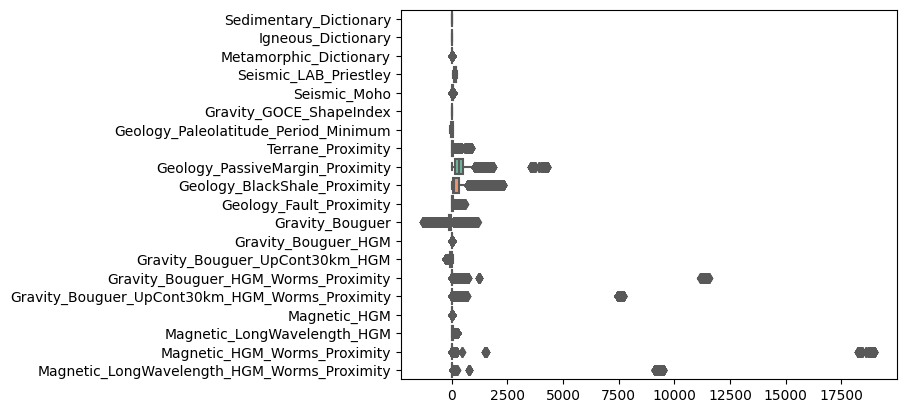

In [9]:
ax = sns.boxplot(data=data_filtered, orient="h", palette="Set2")

We can remove these outliers

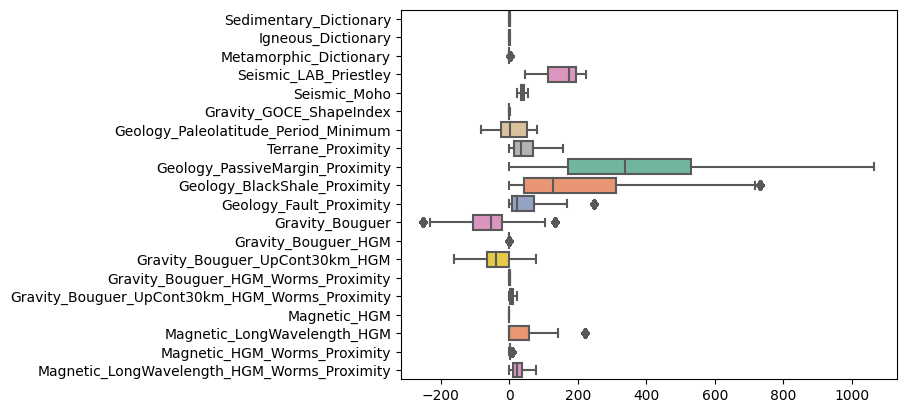

In [10]:
data_filtered = utils.tukey_remove_outliers(data_filtered)
ax = sns.boxplot(data=data_filtered, orient="h", palette="Set2")

There are also many NaNs in the data, these can be "imputed" with the mean value.

In [11]:
print(data_filtered.isna().sum())

Geology_Lithology_Majority                              0
Geology_Period_Maximum_Majority                     44289
Geology_Period_Minimum_Majority                     44289
Sedimentary_Dictionary                                  0
Igneous_Dictionary                                      0
Metamorphic_Dictionary                                  0
Seismic_LAB_Priestley                                   0
Seismic_Moho                                         1307
Gravity_GOCE_ShapeIndex                                 0
Geology_Paleolatitude_Period_Minimum              1039588
Terrane_Proximity                                       0
Geology_PassiveMargin_Proximity                         0
Geology_BlackShale_Proximity                            0
Geology_Fault_Proximity                                 0
Gravity_Bouguer                                     36401
Gravity_Bouguer_HGM                                 36445
Gravity_Bouguer_UpCont30km_HGM                      36427
Gravity_Bougue

In [12]:
data_filtered = utils.impute_nans(data_filtered)
print(data_filtered.isna().sum())

Geology_Lithology_Majority                        0
Geology_Period_Maximum_Majority                   0
Geology_Period_Minimum_Majority                   0
Sedimentary_Dictionary                            0
Igneous_Dictionary                                0
Metamorphic_Dictionary                            0
Seismic_LAB_Priestley                             0
Seismic_Moho                                      0
Gravity_GOCE_ShapeIndex                           0
Geology_Paleolatitude_Period_Minimum              0
Terrane_Proximity                                 0
Geology_PassiveMargin_Proximity                   0
Geology_BlackShale_Proximity                      0
Geology_Fault_Proximity                           0
Gravity_Bouguer                                   0
Gravity_Bouguer_HGM                               0
Gravity_Bouguer_UpCont30km_HGM                    0
Gravity_Bouguer_HGM_Worms_Proximity               0
Gravity_Bouguer_UpCont30km_HGM_Worms_Proximity    0
Magnetic_HGM

Finally, it can be observed the above data is not "normalized", we should make features standard scores / z-scores

(note remaining outliers above were within the Tukey fences calculated over ALL the data)


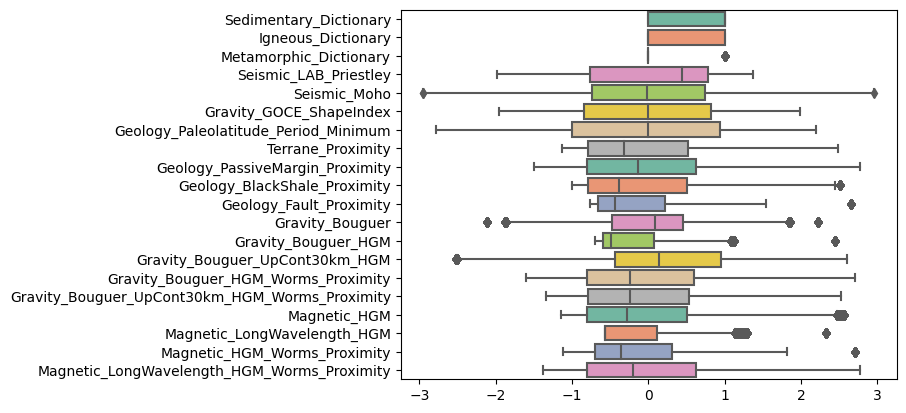

In [13]:
data_filtered = utils.normalize_df(data_filtered)
ax = sns.boxplot(data=data_filtered, orient="h", palette="Set2")
print("(note remaining outliers above were within the Tukey fences calculated over ALL the data)")

Discretizes the continuous variables in 5 bins

In [14]:
nbins = 5
for col in cols:
    if data_filtered[col].dtype != "float64": continue
    data_filtered[col] = pd.qcut(data_filtered[col], nbins)
data_filtered["target"] = labels_filtered

Computes WOE / IV for each variable

In [15]:
lst = []
IV_df = pd.DataFrame(columns=['Variable','IV'])
for col in data_filtered.columns:
    if col == 'DEFAULTER': continue
    else:
        df, iv = utils.calculate_woe_iv(data_filtered, col, 'target')
               
    lst.append(df)
    IV_df = pd.concat([IV_df, pd.DataFrame([{"Variable" :col ,"IV" : iv,}])],ignore_index=True)

/home/local/SRI/e33725/.conda/envs/aie-cmaas/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/local/SRI/e33725/.conda/envs/aie-cmaas/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/local/SRI/e33725/.conda/envs/aie-cmaas/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Merge the WOE data into the existig input datacube

In [16]:
# shows the overall IV for all variables on MVT deposits/occurences
print(f"Information Value Overview:\n{IV_df}\n\n\n")

# shows the WOE for all variables on MVT deposits/occurences
df_result = data_filtered
for i, col in enumerate(cols):
    col_data = lst[i]
    col_data = col_data.rename(columns={"Value":col,"WoE":f"{col}_WoE", "IV":f"{col}_IV"})
    df_result = pd.merge(df_result, col_data[[col,f"{col}_WoE",f"{col}_IV"]], on=col)

Information Value Overview:
                                          Variable        IV
0                       Geology_Lithology_Majority  0.352565
1                  Geology_Period_Maximum_Majority  1.034435
2                  Geology_Period_Minimum_Majority  1.090478
3                           Sedimentary_Dictionary  0.013993
4                               Igneous_Dictionary  0.008236
5                           Metamorphic_Dictionary  0.301764
6                            Seismic_LAB_Priestley  0.570558
7                                     Seismic_Moho  0.334126
8                          Gravity_GOCE_ShapeIndex  1.023776
9             Geology_Paleolatitude_Period_Minimum  0.181726
10                               Terrane_Proximity  0.119756
11                 Geology_PassiveMargin_Proximity  0.916776
12                    Geology_BlackShale_Proximity  0.176636
13                         Geology_Fault_Proximity  1.153662
14                                 Gravity_Bouguer  0.174

Combines the WOE for each comlumn

In [17]:
df_result["WOE Total"] = df_result.loc[:,[f"{col}_WoE" for col in cols]].sum(axis=1)

Adds the latitudes to the datacube to make train, validation, and test splits

In [18]:
df_result["Latitude_EPSG4326"] = data["Latitude_EPSG4326"]
te_df, tr_df, splits = utils.get_spatial_cross_val_idx(df_result)

In [19]:
auc_score = roc_auc_score(tr_df["target"],tr_df["WOE Total"])
print(f"Train AUC score:{auc_score}")
auc_score = roc_auc_score(te_df["target"],te_df["WOE Total"])
print(f"Test AUC score:{auc_score}")
auc_score = roc_auc_score(df_result["target"],df_result["WOE Total"])
print(f"All AUC score:{auc_score}")

Train AUC score:0.8950539996249081
Test AUC score:0.9102236569865378
All AUC score:0.8975796686574521


Shows the cross validation splits (train / val); test split is held out of cross validation

In [20]:
for i, (train_index, val_index) in enumerate(splits):
    print(f"Fold {i}:")
    print(f"  Train: groups={np.unique(tr_df.iloc[train_index.tolist()]['group'].tolist())}")
    print(f"  Val: groups={np.unique(tr_df.iloc[val_index.tolist()]['group'].tolist())}")

Fold 0:
  Train: groups=[0 1 2 4]
  Val: groups=[3]
Fold 1:
  Train: groups=[0 1 3 4]
  Val: groups=[2]
Fold 2:
  Train: groups=[0 2 3 4]
  Val: groups=[1]
Fold 3:
  Train: groups=[1 2 3 4]
  Val: groups=[0]
Fold 4:
  Train: groups=[0 1 2 3]
  Val: groups=[4]
